# IC Photography Styles: App

## Setting Up Necessary Things

In [1]:
# Ignore All Warnings
import warnings
warnings.filterwarnings("ignore")

## Necessary Imports

In [2]:
from fastai.vision.all import *

In [3]:
from fastai.vision.all import load_learner
import gradio as gr

## Modeling

In [4]:
# Model Load
model_version = 0
model = load_learner(f"../models/pst_recognizer_v{model_version}.pkl")

In [5]:
# Labels
pst_labels = model.dls.vocab
pst_labels

['Abstract Photography', 'Architecture Photography', 'Astrophotography', 'Black and White Photography', 'Documentary Photography', 'Double Exposure Photography', 'Event Photography', 'Fashion Photography', 'Fine Art Photography', 'Flower Photography', 'Food Photography', 'Landscape Photography', 'Macro Photography', 'Pet Photography', 'Portrait Photography', 'Product Photography', 'Real estate Photography', 'Sports Photography', 'Still Life Photography', 'Storm Photography', 'Street Photography', 'Surreal Photography', 'Underwater Photography', 'Wedding Photography', 'Wildlife Photography']

In [6]:
# Recognizer Function
def pst_recognizer(pst_image):
  pred, idx, probs = model.predict(pst_image)
  return dict(zip(pst_labels, map(float, probs)))

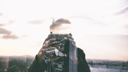

In [7]:
# Image Load
img = PILImage.create("../test_data/double_exposure_photography.jpg")
img.thumbnail((128, 128))
img

In [8]:
# Prediction Probabilities
pst_recognizer(img)

{'Abstract Photography': 5.4450509196612984e-05,
 'Architecture Photography': 0.0003387904725968838,
 'Astrophotography': 0.00017529833712615073,
 'Black and White Photography': 0.00010269173799315467,
 'Documentary Photography': 0.2646128535270691,
 'Double Exposure Photography': 0.5836631059646606,
 'Event Photography': 0.004432544577866793,
 'Fashion Photography': 0.0006036774138920009,
 'Fine Art Photography': 0.024323586374521255,
 'Flower Photography': 1.8752059986582026e-05,
 'Food Photography': 0.00022933857690077275,
 'Landscape Photography': 0.0010654981015250087,
 'Macro Photography': 3.9119455323088914e-05,
 'Pet Photography': 0.0013744968455284834,
 'Portrait Photography': 0.00010114236647496,
 'Product Photography': 0.000160554118338041,
 'Real estate Photography': 0.00023199945280794054,
 'Sports Photography': 8.31353390822187e-05,
 'Still Life Photography': 3.974159699282609e-05,
 'Storm Photography': 8.711935515748337e-05,
 'Street Photography': 0.0016468397807329893,


## Gradio Application

In [9]:
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()

examples = [
    "architecture_photography.jpg",
    "double_exposure_photography.jpg",
    "food_photography.jpg",
    "landscape_photography.jpg",
    "portrait_photography.jpg"
]

iface = gr.Interface(fn=pst_recognizer, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False, share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app
